In [11]:
%pylab inline

import essentia.standard as ess

nfft = 512
nhop = 256
fs = 16000.0
fs_new = 22000.0

nfft_out = (nfft // 2) + 1

resampler = ess.Resample(inputSampleRate=fs, outputSampleRate=fs_new, quality=0)
window = ess.Windowing(size=nfft, type='blackmanharris62')
spectrum = ess.Spectrum(size=nfft)
mfcc = ess.MFCC(inputSize=nfft_out, numberBands=40, numberCoefficients=13, sampleRate=fs_new)

x = resampler(ess.MonoLoader(filename = 'SI648.WAV', sampleRate = fs)())

mfccs = []

for frame in ess.FrameGenerator(x, frameSize=nfft, hopSize=nhop):          
  mX = spectrum(window(frame))
  mfcc_bands, mfcc_coeffs = mfcc(mX)
  mfccs.append(mfcc_coeffs)            
mfccs = np.array(mfccs)
print mfccs.shape

Populating the interactive namespace from numpy and matplotlib
(312, 13)


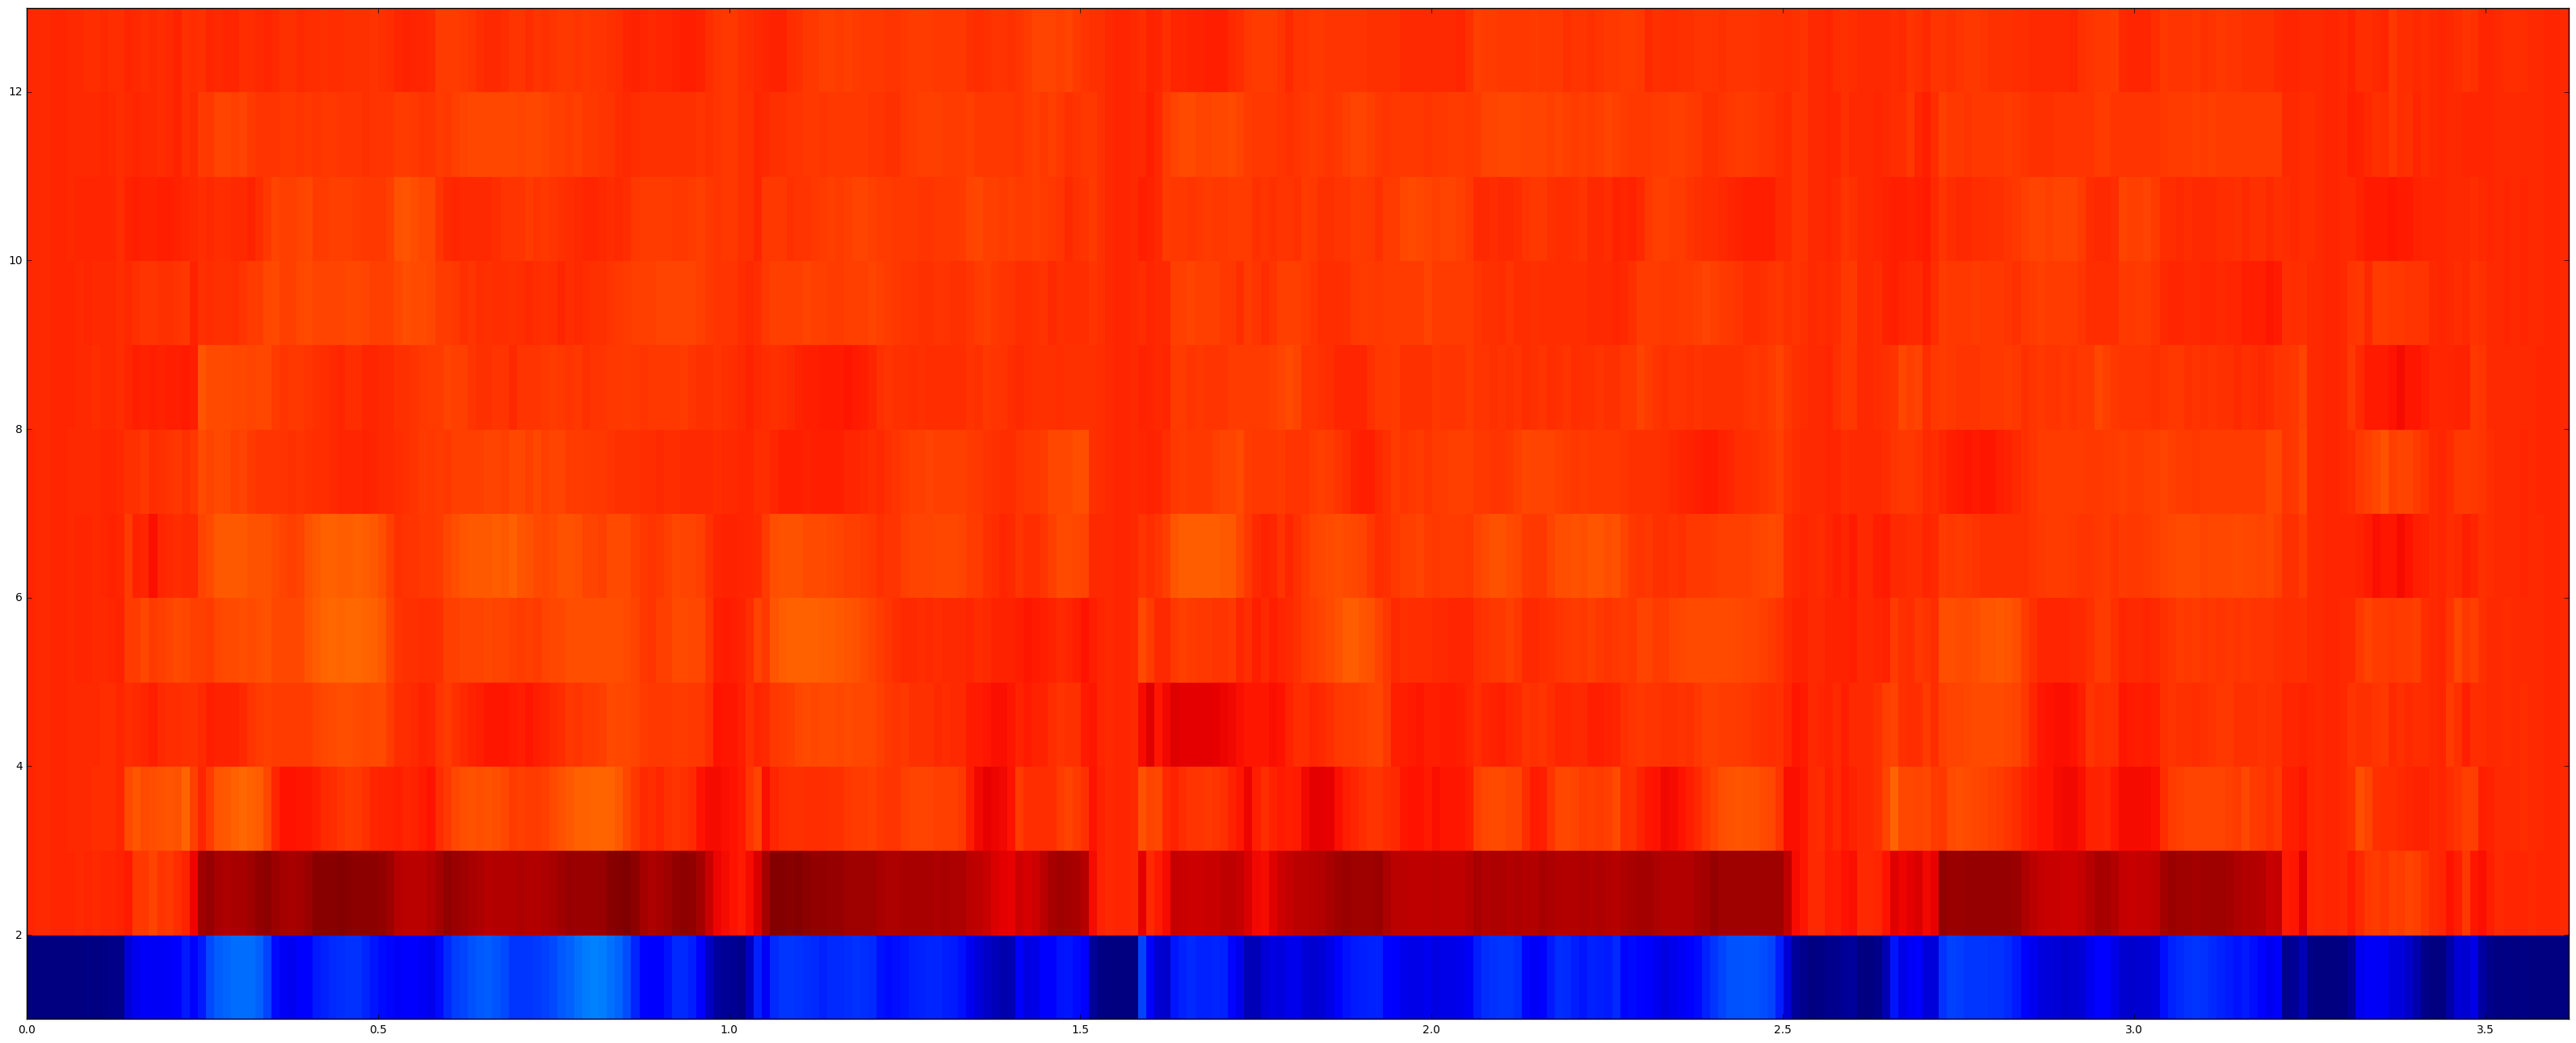

In [14]:
plt.figure(figsize=(32, 13), dpi=80)
numFrames = int(mfccs[:,0].size)
frmTime = nhop*np.arange(numFrames)/float(fs_new)
plt.pcolormesh(frmTime, 1+np.arange(13), np.transpose(mfccs[:,0:]))
plt.autoscale(tight=True)
plt.tight_layout()
plt.show()